In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import seaborn as sns

In [77]:
df_bw = pd.read_excel("data_birthweight.xlsx")

In [78]:
print(f"COLUMNS:\n\n{df_bw.columns}")
print(f"\nSHAPE:\n{df_bw.shape}")

COLUMNS:

Index(['nprevist', 'alcohol', 'tripre1', 'tripre2', 'tripre3', 'tripre0',
       'birthweight', 'smoker', 'unmarried', 'educ', 'age', 'drinks'],
      dtype='object')

SHAPE:
(3000, 12)


In [16]:
df_bw.head

<bound method NDFrame.head of       nprevist  alcohol  tripre1  tripre2  tripre3  tripre0  birthweight  \
0           12        0        1        0        0        0         4253   
1            5        0        0        1        0        0         3459   
2           12        0        1        0        0        0         2920   
3           13        0        1        0        0        0         2600   
4            9        0        1        0        0        0         3742   
...        ...      ...      ...      ...      ...      ...          ...   
2995        15        0        0        1        0        0         2520   
2996        10        0        1        0        0        0         3062   
2997        11        0        0        1        0        0         3799   
2998        10        0        1        0        0        0         2070   
2999        11        0        1        0        0        0         2948   

      smoker  unmarried  educ  age  drinks  
0          1

In [27]:
mean_bw = np.mean(df_bw['birthweight'])
median_bw = np.median(df_bw['birthweight'])
mode_bw = stats.mode(df_bw['birthweight'])

print(f"MEAN: {mean_bw}\nMEDIAN: {median_bw}\nMODE: {mode_bw}")

MEAN: 3382.933666666667
MEDIAN: 3420.0
MODE: ModeResult(mode=array([3430], dtype=int64), count=array([63]))


In [30]:
stats.describe(df_bw['birthweight'])

DescribeResult(nobs=3000, minmax=(425, 5755), mean=3382.933666666667, variance=350656.8868955207, skewness=-0.825878868144944, kurtosis=2.547542396076752)

In [50]:
slope, intercept, r, p, std_err = stats.linregress(df_bw['smoker'],df_bw['birthweight'])

print(f"birthweight= = {intercept} + {slope}(smoker = 1,0)")
print(f"\nr: {r}\nstandard error: {std_err}")

birthweight= = 3432.059966914806 + -253.22835179453168(smoker = 1,0)

r: -0.16912660155153952
standard error: 26.951490642156553


In [91]:
cormat = df_bw.corr()
cormat['birthweight']

nprevist       0.227360
alcohol       -0.033647
tripre1        0.112377
tripre2       -0.066714
tripre3       -0.046495
tripre0       -0.123500
birthweight    1.000000
smoker        -0.169127
unmarried     -0.203235
educ           0.105207
age            0.080073
drinks        -0.032409
Name: birthweight, dtype: float64

<AxesSubplot:>

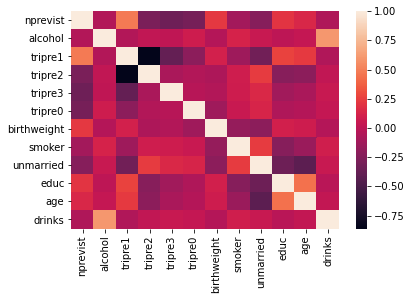

In [95]:
sns.heatmap(cormat)

(array([  15.,   18.,   42.,  137.,  565., 1188.,  812.,  207.,   13.,
           3.]),
 array([ 425.,  958., 1491., 2024., 2557., 3090., 3623., 4156., 4689.,
        5222., 5755.]),
 <BarContainer object of 10 artists>)

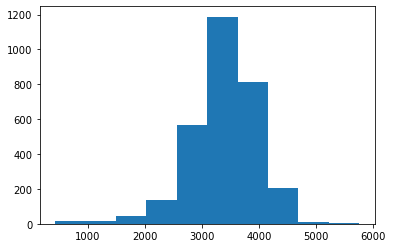

In [34]:
plt.hist(df_bw['birthweight'])

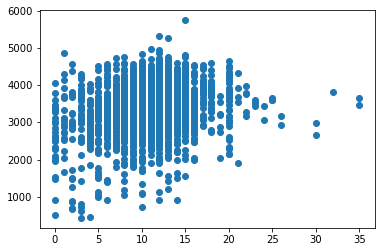

In [57]:
plt.scatter(df_bw['nprevist'],df_bw['birthweight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23103102a60>,
 'caps': [<matplotlib.lines.Line2D at 0x2310310e160>,
 'boxes': [<matplotlib.lines.Line2D at 0x23103102700>],
 'medians': [<matplotlib.lines.Line2D at 0x2310310e820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2310310eb80>],
 'means': []}

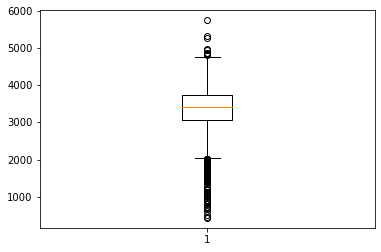

In [56]:
plt.boxplot(df_bw['birthweight'])

In [59]:
df_bw.loc[2,"birthweight"]

2920

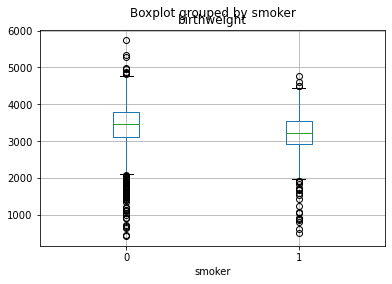

In [104]:
boxplot_smokers = df_bw.boxplot(column="birthweight", by="smoker")

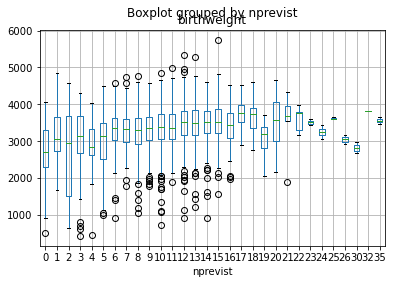

In [79]:
boxplot_nprevist = df_bw.boxplot(column ="birthweight", by = "nprevist")

# Multiple Regression analysis

In [105]:
X = df_bw[['nprevist','smoker']]
Y = df_bw['birthweight']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

regr.coef_

array([  34.10394232, -218.82938463])